In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
# WARNING, FILE "delay_clean.csv" is 2.5 GB  --  added to gitignore

clean_data = pd.read_csv("./Resources/delay_clean.csv", nrows = 60_000, encoding = 'utf-8')
clean = pd.DataFrame(clean_data)

In [3]:
clean

,DEP_DEL15,MONTH_1,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,DEP_TIME_BLK_0001-0559,...,"PRCP_groups_(0.11, 2.45]","SNOW_groups_(-0.001, 7.8]","TMAX_groups_(2.999, 37.0]","TMAX_groups_(37.0, 51.0]","TMAX_groups_(51.0, 66.0]","TMAX_groups_(66.0, 85.0]","AWND_groups_(0.889, 5.14]","AWND_groups_(5.14, 8.28]","AWND_groups_(8.28, 11.41]","AWND_groups_(11.41, 23.71]"
0,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
4,0,1,0,0,0,0,0,0,1,1,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
59996,1,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
59997,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
59998,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [4]:
# Number of flights not delayed (0), and delayed (1)
clean['DEP_DEL15'].value_counts()

0    48805
1    11195
Name: DEP_DEL15, dtype: int64

### Check if delays / on time flights ratio is still the same

With all data: delay / on time = 1,227,368 / 5,261,694 = 0.23

With 60,000 rows: 11,197 / 48,803 = 0.23

## Random Forest Model

In [5]:
# Remove "DEP_DEL15" target (delayed more than 15 minutes) from features data

y = clean.DEP_DEL15
X = clean.drop("DEP_DEL15", axis = 1)

In [6]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50, stratify = y)

In [7]:
# Create a StandardScaler instance
scaler = StandardScaler()

In [8]:
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

In [9]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators = 128, random_state = 50)

In [11]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [12]:
# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.821


In [13]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(
    cm, index=["Actual On-time", "Actual delayed"], columns=["Predicted On-time", "Predicted delayed"])

cm_df

,Predicted On-time,Predicted delayed
Actual On-time,11554,647
Actual delayed,2031,768


In [14]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     12201
           1       0.54      0.27      0.36      2799

    accuracy                           0.82     15000
   macro avg       0.70      0.61      0.63     15000
weighted avg       0.79      0.82      0.80     15000



In [15]:
# Calculate feature importance in the Random Forest model
importances = rf_model.feature_importances_
importances

array([0.00000000e+00, 1.16321529e-02, 1.04183083e-02, 8.75273183e-03,
       1.30605618e-02, 1.14841016e-02, 0.00000000e+00, 8.15671617e-04,
       2.11047680e-03, 5.61456007e-03, 8.34248526e-03, 8.99325268e-03,
       1.14638223e-02, 1.24727327e-02, 1.32044105e-02, 1.41689942e-02,
       1.39160457e-02, 1.49265220e-02, 1.53500474e-02, 1.46080223e-02,
       1.48192397e-02, 1.34152535e-02, 1.40315272e-02, 1.33434132e-02,
       9.68420574e-03, 7.95466536e-03, 2.75058593e-03, 2.65430372e-02,
       2.50895212e-02, 2.48752083e-02, 1.85121115e-02, 1.88319167e-02,
       1.92559477e-02, 1.93837734e-02, 1.75383595e-02, 1.06524375e-02,
       1.48512989e-02, 1.32214927e-02, 8.70210799e-03, 9.76903980e-03,
       1.51916247e-02, 1.67188120e-02, 1.55133964e-02, 3.53407299e-03,
       7.86125876e-04, 9.06563021e-03, 4.28006325e-03, 2.40851426e-03,
       3.41447560e-03, 9.50352406e-03, 5.04680860e-03, 3.58888836e-03,
       4.75394548e-04, 6.18361701e-03, 2.58154811e-03, 4.91491724e-03,
      

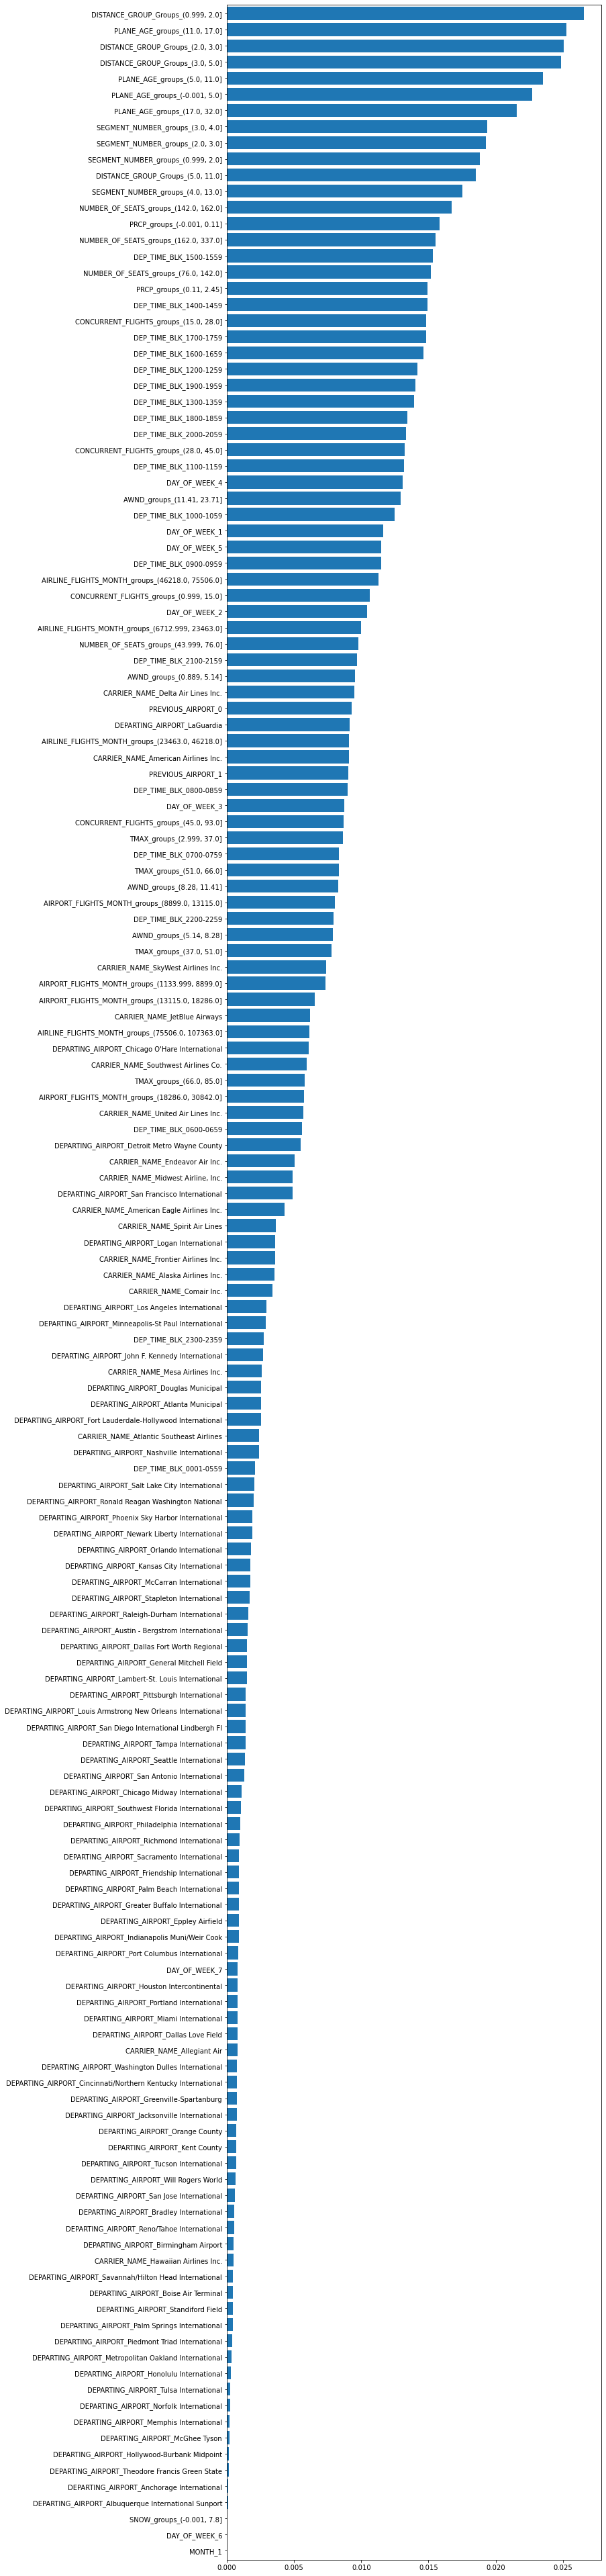

In [16]:
# Sorting the features by their importance

features = sorted(zip(X.columns, rf_model.feature_importances_), key = lambda x: x[1], reverse = False)
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,70)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [17]:
# Label (DEP_DEL15) and Features:

for item in clean:
    print(item)

DEP_DEL15
MONTH_1
DAY_OF_WEEK_1
DAY_OF_WEEK_2
DAY_OF_WEEK_3
DAY_OF_WEEK_4
DAY_OF_WEEK_5
DAY_OF_WEEK_6
DAY_OF_WEEK_7
DEP_TIME_BLK_0001-0559
DEP_TIME_BLK_0600-0659
DEP_TIME_BLK_0700-0759
DEP_TIME_BLK_0800-0859
DEP_TIME_BLK_0900-0959
DEP_TIME_BLK_1000-1059
DEP_TIME_BLK_1100-1159
DEP_TIME_BLK_1200-1259
DEP_TIME_BLK_1300-1359
DEP_TIME_BLK_1400-1459
DEP_TIME_BLK_1500-1559
DEP_TIME_BLK_1600-1659
DEP_TIME_BLK_1700-1759
DEP_TIME_BLK_1800-1859
DEP_TIME_BLK_1900-1959
DEP_TIME_BLK_2000-2059
DEP_TIME_BLK_2100-2159
DEP_TIME_BLK_2200-2259
DEP_TIME_BLK_2300-2359
DISTANCE_GROUP_Groups_(0.999, 2.0]
DISTANCE_GROUP_Groups_(2.0, 3.0]
DISTANCE_GROUP_Groups_(3.0, 5.0]
DISTANCE_GROUP_Groups_(5.0, 11.0]
SEGMENT_NUMBER_groups_(0.999, 2.0]
SEGMENT_NUMBER_groups_(2.0, 3.0]
SEGMENT_NUMBER_groups_(3.0, 4.0]
SEGMENT_NUMBER_groups_(4.0, 13.0]
CONCURRENT_FLIGHTS_groups_(0.999, 15.0]
CONCURRENT_FLIGHTS_groups_(15.0, 28.0]
CONCURRENT_FLIGHTS_groups_(28.0, 45.0]
CONCURRENT_FLIGHTS_groups_(45.0, 93.0]
NUMBER_OF_SEATS_grou